## Regression analysis

- Regression models are used to predict target variables on a continuous scale.

## Introducing linear regression

The goal of linear regression is to model the relationship between one or multiple features and a continuous target variables.

We willbe introduced to the most basic type linear regression, simpler linear regression , and relate it to the more general, multivariate case(linear regression with multiple features).

### Simple linear regression

- The goal of simple(__univatiate__) linear regression is to model the relationship between a single feature( __explanatory variable__ x) and a continuous valued __response__(__target variable__ y). the equation of a linear model with one explanatory variable is defined as follows:

<center>$y = w_0 +w_1x$</center>

Here, the weight $w_0$ represent the y-axis intercept and $w_1$ is the weight coefficient of the explanatory variable. Our goal is to learn the weights of the linear equation to describe the relationship between the explanatory variable and the target variable, which can then be used to predict the responses of new explanatory variable that were not part of the training.

![simple_linear.png](simple_linear.png)

### Multiple linear regression

<center>$y = w_0x_0 +w_1x_1+...+w_mx_m  = \space \sum_{i=0}^{m} w_ix_i = w^Tx$ </center>

Here, $w_0$ is the y-axis intercept with $x_0=1$


In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch10/housing.data.txt',
                header=None, sep='\s+')

In [4]:
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','FTRATIO','B','LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,FTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Visualizing the important characterisitics of a dataset

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
cols = ['LSTAT','INDUS','NOX','RM','MEDV']

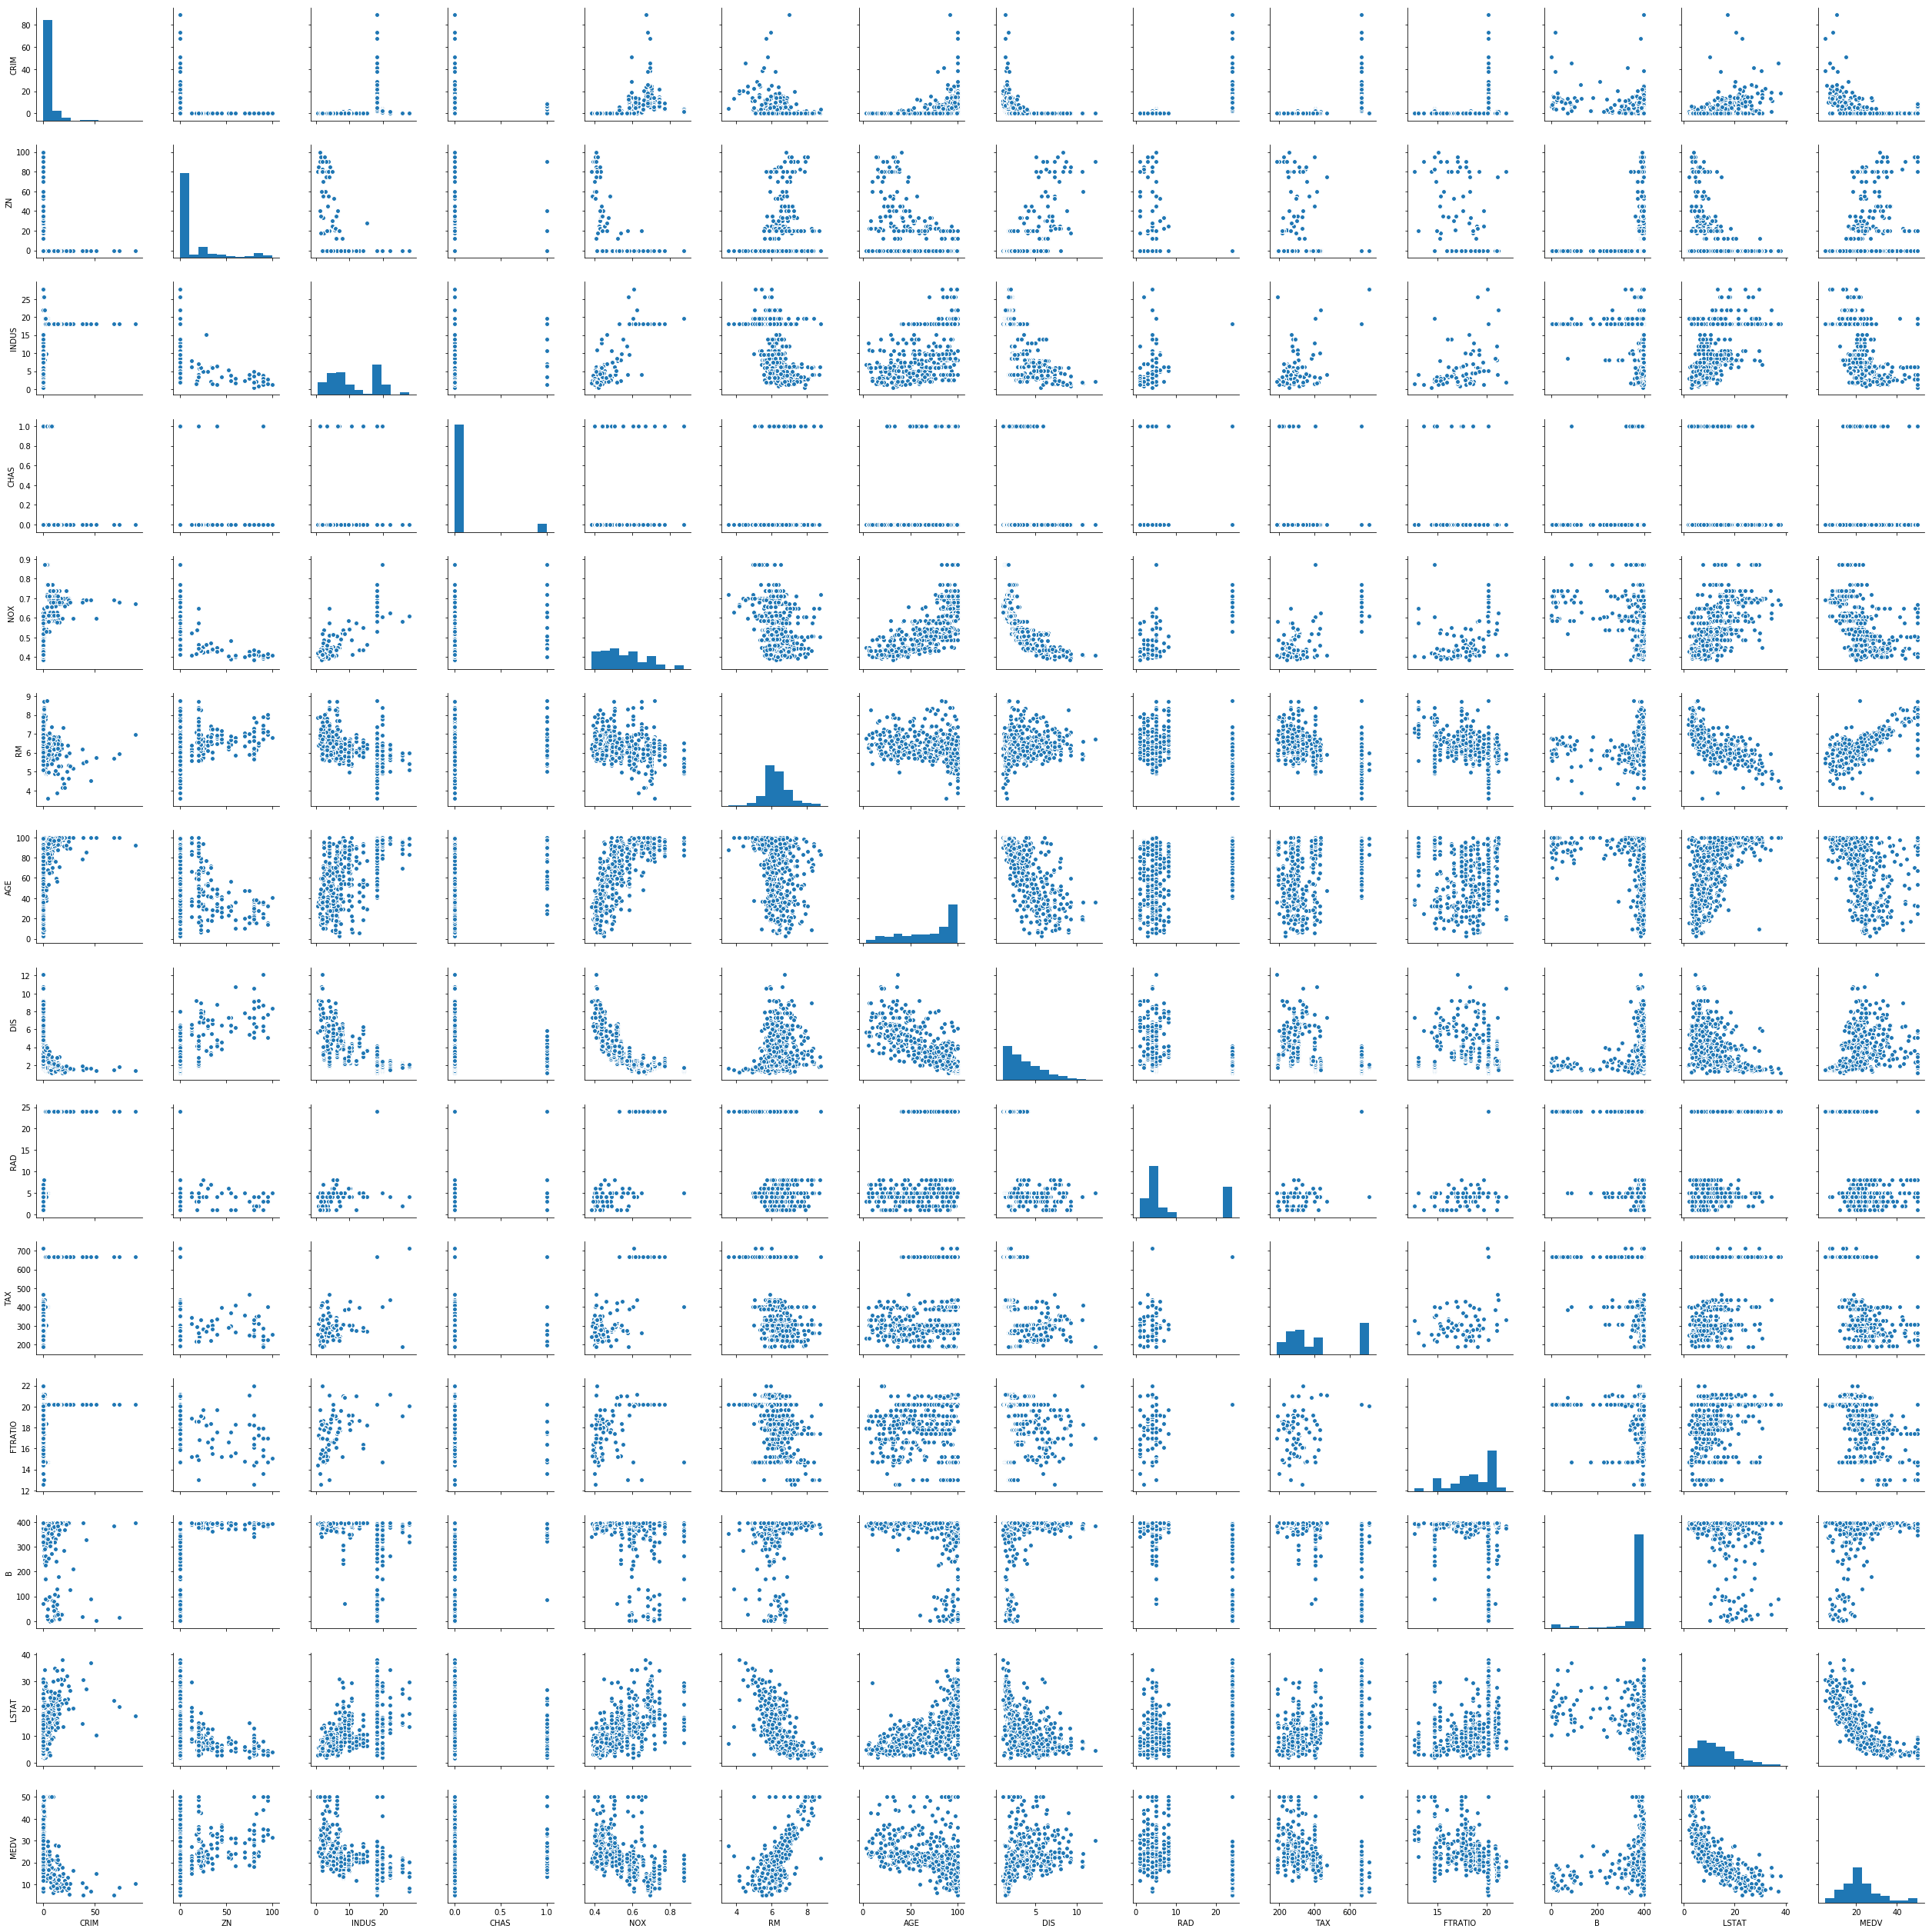

In [8]:
sns.pairplot(df[df.columns], size=2.5)
plt.tight_layout()
plt.show()

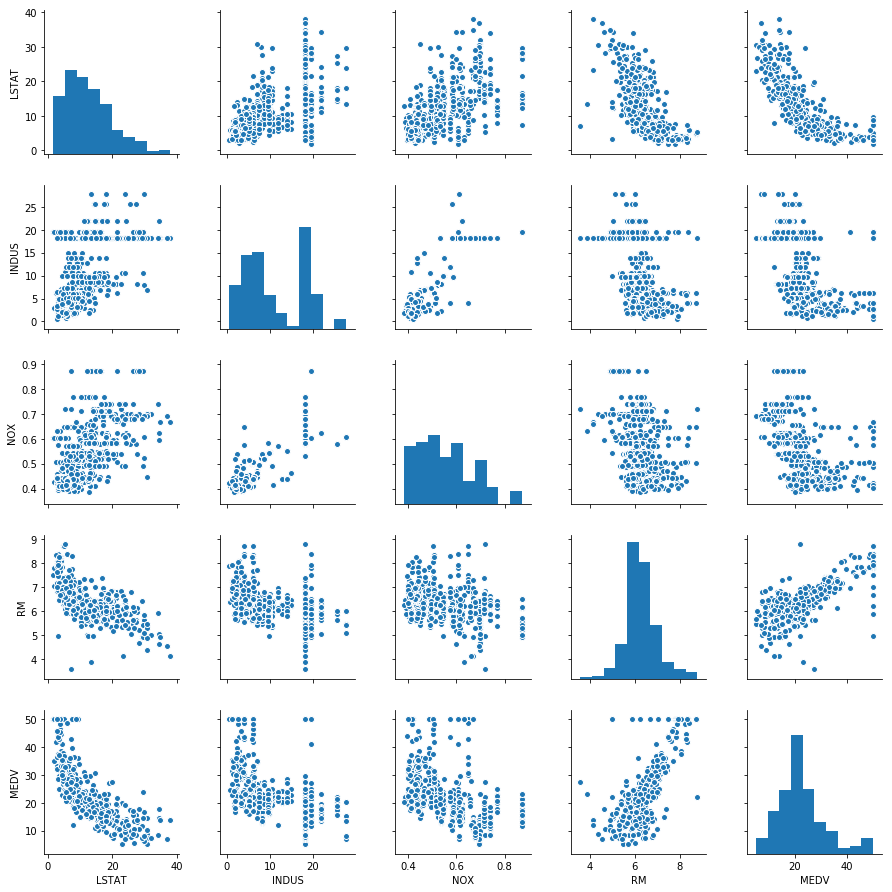

In [9]:
cols = ['LSTAT','INDUS','NOX','RM','MEDV']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

Using scatterplot matrix we can quickly eyeball how the data is distributed and whether it contains outliers, For example, we can see that there is a linear relationship between _RM_ and house prices _MEDV_

> <font style= 'color:#ad42f5'>__Note__ : that in contrast to common belief, training a linear regression model does not require that the explanatory or target varaibles are normally distributed . The normality assumption is only a requirement for certain statistics and hypothesis tests.</font>

### Looking at relationships using a correlation matrix.
_In the previous section_ we visualized the data distributions of the Housing dataset variables in the form of histograms and scatter plots. Next, we will create a correlation matrix to quantify and summarize linear relationships between varaibles.

A correlation matrix is closely related to the coovraince matrix that we have seen in the section about __Principal Component Analysis (PCA)__.

- The correlation matrix is a square matrix that contains __Pearason product-moment correlation coefficeint__ (often abbreviated as __Pearson's r__), which measure the linear dependence between paris of features. 

- <font style= 'color:#ad42f5'>The correlations coefficient are in the range -1 to 1. Two features have a 
1. perfect positive correlation if r=1,
2. no correlation if r=0, 
3. and a perfect negative correlation if r=-1.</font>

<center><font style= 'size:20px'>$r = \frac {\sum _{i=1}^{n}\space [(x^{(i)}-\mu_x)\space(y^{(i)}-\mu_y)]}{\sqrt {\sum_{i=1}^{n}\space (x^{(i)}-\mu _x)^2}\sqrt {\sum_{i=1}^{n}\space (y^{(i)}-\mu _y)^2}} = \frac {\sigma_{xy}}{\sigma_x \space \sigma_y}$</font></center>

Here, $\mu$ denotes the sample mean of the corresponding feature, $\sigma_{xy}$ is the covariance between the featues _x_ and _y_, and $\sigma_x$ and $\sigma_y$ are the features' standard deviations

In [7]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)

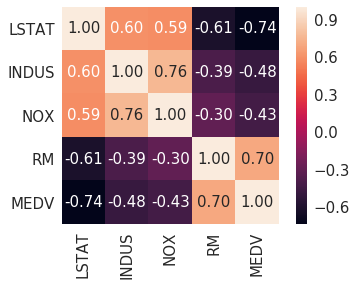

In [13]:
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, 
                yticklabels=cols, xticklabels=cols)
plt.show()

To fit a linear regression model, we are interested in those features that have a high correlation with our target variable _MEDV._ lOOKING AT THE PREVIOUS CORRELATION MATRIX, WE SEE THAT OUR TARGET VARIABLE _MEDV_ shows the largest correlation with the _LSTAT_ variable (-0.74) ; however as we might remember from inspecting the scatterplot matrix, there is a clear nonlinear relationship between _LSTAT_ and _MEDV_. On the other hand, the correlation between _RM_ and _MEDV_ is also relatively high(0.70) . Gien the linear relationship between these two variables that we observe in the scatterplot, _RM_ seems to be a good choice for an exploratory variable to introduce the concepts of a simple linear regression model in the follwoing section.

### Implementing an ordinary least squares linear regression model

__Ordinary least Squares(OLS)__ method (sometimes also called __linear least squares__) to estimate the parameters of the linear regression line that minimizes the sum of the squared vertical distances (residuals or errors) to the sample points.

The cost function is the __Sum of Squared Errors (SSE)__ , which is identical to the cost function that we use for OLS:

<center>$J(w) = \frac {1}{2} \sum_{i=1}^{n}(y^{(i)}- y^{'(i)})^2$</center>


Here y' is the predicted values $ y' = w^T x $ (note that the term 1/2 is just used for convenience ot derive the update rule of GD). 

In [8]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output  = self.net_input(X)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]  + self.w_[0])
    
    def predict(self, X):
        return self.net_input(X)

In [17]:
X.shape, y[:, np.newaxis].shape


((506, 1), (506, 1, 1))

In [18]:
X = df[['RM']].values
y = df['MEDV'].values

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearRegressionGD()

lr.fit(X_std, y_std)

- Notice the workaround regaridng y_std , using _np.newaxis_ and _flatten_ .  Most transformers in scikit-learn expect data to be stored in two-dimensional arrays. In the previous code example, the use of _np.newaxis_ in _y[:, np.newaxis]_ added a new dimension to the array. Then, after the _StandarScaler_ returned the scaled varianle we converted it back to the orignnal one-dimensional array representation using the _flatten()_ method for our convenience.

In [22]:
sns.reset_orig()

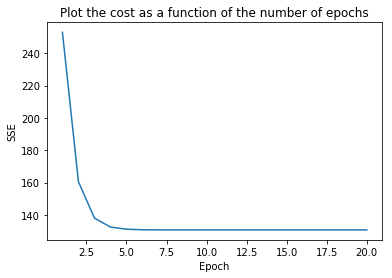

In [23]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.title('Plot the cost as a function of the number of epochs')
plt.show()

GD algorithm converged after the fifth epoch

In [9]:
def lin_regplot(X,y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white',s=70)
    plt.plot(X, model.predict(X), color='black',lw=2)
    return None

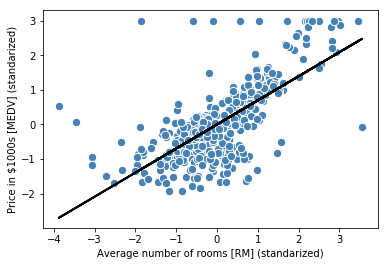

In [26]:
lin_regplot(X_std,y_std, lr)
plt.xlabel('Average number of rooms [RM] (standarized)')
plt.ylabel('Price in $1000s [MEDV] (standarized)')
plt.show()

The linear regression line reflects the general trend that house prices tend to incrrease with the number of rooms.

Intrertingly, we also observe that several data points lined up at y =3, which suggests thtthe prices may have been clipped. In certain applications, it may also be important to report the preidcted outcome vatiables on theri original scale

In [31]:
num_room_std = sc_x.transform(np.array([5.0]).reshape(1,-1))
price_std = lr.predict(num_room_std)
print('Price in $1000s : %.3f' % sc_y.inverse_transform(price_std))

Price in $1000s : 10.840


> On a side note, it is als worth mentioning that we techincally don;t have to update the weights of teh intercept if we are working with standardized variables since the y-axis intercept is always 0 in those cases. We can quickly confrim this b printing the weights:



In [32]:
print('Slope: %.3f ' %lr.w_[1])
print('Intercept: %.3f ' %lr.w_[0])


Slope: 0.695 
Intercept: -0.000 


### Estimating coefficient of a regression model via scikit-learn

Many of scikit-learns's esitmators for regression make use of the  __LIBLINNEAR__ libtary, advanced optimizatino algorithms, and other ocde optimations that work better with unstandardized variables, whcih is somethims desirables for cetain applications:

In [12]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

slr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
print('Slope: %.3f' %slr.coef_[0])
print('Intecept: %.3f' %slr.intercept_)

Slope: 9.102
Intecept: -34.671


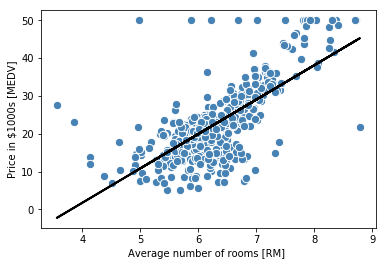

In [35]:
lin_regplot(X,y, slr)
plt.xlabel('Average number of rooms [RM] ')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

### Fitting a robust regression model using RANSAC

- Linear regression models can be heaily impacted by the presence of outliers.
- In certain situations, __a very small subset of our data can have a big effect on the estimated model coefficients.__
- there are many __statistical test that should be used to detect outliers. __
- However, removing outliers alwasy requires our own judgement as data scientists as well as our domain knowledge.

As an alternative to throwing out outlier, we will look at a robus mthod of regression usign the __RANdom SAmple Consensus (RANSAC)__ algorithm, which fits a regression model to a subse tof the data, the so-called __inliers.__

We can summarize the iterative RANSAC algorithm as follows:

1. Select a random number of samples to be inliers and fit the model.
2. Test all other data points against the fitted model and add those points that fall within a user-given tolerance to the inliers
3. Refit the model using all inliers.
4. Estimate the error of the fitted model versus the inliers.
5. Terminate the algorithm if the performacne meets a certain user-defined threshold or if a fixed number of iterations are reached; go back to step 1 otherwise.

In [37]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                        max_trials = 100,
                        min_samples =50,
                        loss='absolute_loss',
                        residual_threshold=5.0,
                        random_state=0)

ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_metric=None, residual_threshold=5.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

We set the number of iterations to 100, and using _min-samples=50_ ,we set the minimum number of the randomly shcosedn samples to be atleast 50. Using the _'absolute-loss'_ as an argument for the _residual-metirc_ Paraemeter, the algorithm computes absolute vertical dsitances betwen then fitted line and the sample points. 

- By setting _residula-thershold_ parameter to _5.0_ , we only allowed smaples to be included in the inlier set if theri vertical distance to the fitted  line is within 5 distance units, which works well on this particular datset.


By default, scikit-learn uses the __MAD__ estimate to select the inlier threshold, WHERE MAD  stand for the __MEDIAN ABSOLUTE DEVIATION__ of the target values y. However the choice of an appropirate value for the inlier threhsold is problem-specific, which is one disadvantage of RANSAC.

Let's obtain the inliers and outliers form the fitted RANSAC-linear regression model and plt them together with the linear fit.:

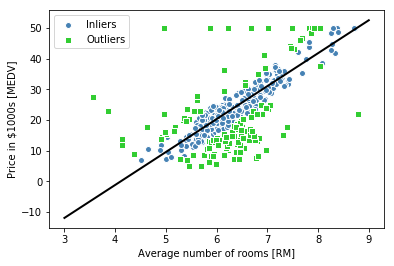

In [40]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)


line_X = np.arange(3,10,1)
line_y_ransac =  ransac.predict(line_X[:, np.newaxis])

plt.scatter(X[inlier_mask], y[inlier_mask], c='steelblue', edgecolor='white', marker='o',label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='limegreen', edgecolor='white', marker='s',label='Outliers')

plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

plt.legend(loc='upper left')
plt.show()

As we can see in the above scatterplot, the linear regression mdoel was fitted on the detected set of inliers, shown as circles.

In [41]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intecept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intecept: -44.089


### Evaluating the performance of linear regression models

- It is crucial to test the model on data that it hasn't seen during training to obtain a more unbiased estimate of tis perofrmacne.


In [10]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [13]:
slr = LinearRegression()
slr.fit(X_train, y_train)


y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

> since; our model use multiple exlanatory varibales, we can't visualize the linear regression line (or hyperplane to be preciese) in a two-dimensional plot, but we can plot the residuals ( the differences or vertical distances between the acutal and predicted values) versus the predicted vlaeus to dagnose our regression model. __Residual plots__ are a commonly used graphical tool for diagnoising regression models.
They can help detect nonlinearity and outliers, and check whether the errors are randomly distributed.

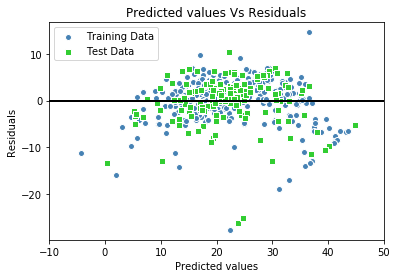

In [52]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o',edgecolor='white' , label='Training Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s',edgecolor='white', label='Test Data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='best')
plt.title('Predicted values Vs Residuals')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)

plt.xlim([-10,50])
plt.show()

In case of a pefect prediciton, the residuals would be exactly zero, whcihc we will probably never encounter in realistic and practical applicaitons, 

- For a good regression model, we would expect that the errors are randomly distributed and the residuals should be randomly scattered around the centerline.
- If we see pattrns in a residual plot, it means that ourmodel is unable to capture some explanatory information, which has leaked into the residuals as we can slightly see in our previos residual plot. Furthremore, we can also use reidula plots to detect outliers, which ae represented by the points with a large deviation from the centerline.




Another useful quantiatiev measure of a model's performance is the so-called __Mean Squared Error (MSE)__, which is simply the average value of the __SSE__ cost tahe we minimize to fit the lienar regression model. The MSE is useful to compare diffferent regression models or for turning their parametes via grid serach and cross-validation, as it normalizes the SSE by the sample size


<center>$MSE= \frac {1}{n} \sum_{i=1}^{n}(y^{(i)}- y'^{(i)})^2$</center>

In [14]:

from sklearn.metrics import mean_squared_error

print('MSE train %.3f, test %.3f'  %(mean_squared_error(y_train, y_train_pred),
                                     mean_squared_error(y_test, y_test_pred)))

MSE train 19.958, test 27.196


Sometimes 

Sometimes it may be moer useful to report the __coefficient of dertminations ($R^2$)__, which can be understood as as standaridzed version oft eh MSE, for better interpretability of themodel's pefromacne. Or in other words, $R^2$ is the fraction of response variance that is captured by the model.

<center>$R^2 = 1 - \frac {SSE}{SST}$</center>

Here, SSE is the um of squred erros and SST is the total sum of squres.

<center>$SST = \sum_{i=1}^{n}(y^{(i)}- \mu_y)^2$</center>

In other words, SST is simply the varinace of the response.


Let us quickly shw that$R^2$ is indeed just a rescaled version of the MSE.

<center>$R^2 = 1 - \frac {SSE}{SST}$</center>


<center>$1- \frac{ \frac {1}{n} \sum_{i=1}^{n} \space (y^{(i)}- y'^{(i)} \space )^2} { \frac {1}{n} \space \sum_{i=1}^{n} \space (y^{(i)}- \mu_y)^2}$</center>


<center>$1- \frac {MSE}{Var(y)}$</center>

<font style= 'color:#ad42f5'> __For the training dataset, the $R^2$ is bounded between 0 and 1.
But it can become negative for the test set.__ </font>

If $R^2$ =1, the model fits the data pefectly with a corresponding MSE= 0

In [16]:
from sklearn.metrics import r2_score

print('R^2 train : %.3f , test : %.3f'  %(r2_score(y_train, y_train_pred),
                                        r2_score(y_test, y_test_pred)))

R^2 train : 0.765 , test : 0.673


### Using regularized methods for regression 

The most popular approaches to regualrized linear regrssion are the so-called __Ridge regression, Least Absolute Shrinkage and Selection Operator (LASSO),__ and __Elastic Net__

#### Ridge Regression

is an L2 penalized model where we simply add the squared sum of the weights to our least-squres cost fucntion:

<center>$J(w)_{Ridge} = \sum_{i=1}^{n}(y^{(i)}- y'^{(i)})^2 \space + \space \lambda ||w||_2^2$</center>

Here:
<center>$L2: \space \space \lambda ||w||_2^2 \space = \lambda \sum_{j=1}^{m}w_j^2$</center>

By __increasing __ the value of hyperparameter __$\lambda$, we increase the regularization __ strength and __shrink the weights __ to our model. 

__Please note that we don't regularize the intercept term $w_0$__

In [17]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)

#### LASSO
Depending on the regularization strenght, cetian weights cna become zero, which also makes __LASSO__ useful __as a suprevise featuere selction techinque:__

<center>$J(w)_{Ridge} = \sum_{i=1}^{n}(y^{(i)}- y'^{(i)})^2 \space + \space \lambda ||w||_1$</center>

Here:
<center>$L1: \space \space \lambda ||w||_1 \space = \lambda \sum_{j=1}^{m}|w_j|$</center>

However, a limitation of LASSO is that it selects at most n variables if m >n , where m is the numer of variables and n is the number of observations

In [18]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

#### Elastic Net

A compormise between Ridge Regression and LASSO is elsastic Net, whcih has L1 penaly to generate sparsity and an L2 penaly to overcome some of the limitations of LASSO, such as the number of selected variables


<center>$J(w)_{Elastic Net} = \sum_{i=1}^{n}(y^{(i)}- y'^{(i)})^2 \space + \space \lambda_1 \sum_{j=1}^{m}w_j^2 \space + \space \lambda_2 \sum_{j=1}^{m}|w_j|$</center>


In [19]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

the ___ElasticNet___ implementation allows us to vary the L1 to L2 ratio:

for example: if we set the l1_ratio =1.0, the _ElasticNet_ regressor would be equal to LASSO regression.

## Turning a linear regression model into a curve - polynomial regression

_In the previous sections_, we assumed a linear relationship between explanatory and reponse variables. One way to account for the violation of linearity assumption is to use a polynomial regression model by adding polynomial terms.

<center>$y = w_0 +w_1x +w_2x^2 +...+w_dx_d  $</center>


Here _d_, denotes the degree of the polynomial. Although we can use polynomial regression to model a non-linear relationship, it is still __considered a multiple linear regression model__ because of the __linear regression coefficients _w___. 

### Adding polynomial terms using scikit-learn

Add a second degree polynomial term:

In [32]:
from sklearn.preprocessing import PolynomialFeatures

X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:,np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])


lr = LinearRegression()
pr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)

X_quad = quadratic.fit_transform(X)

Fit a simple linear regression model for comparison:

In [33]:
lr.fit(X,y)

X_fit = np.arange(250,600,10)[:,np.newaxis]
y_lin_fit = lr.predict(X_fit)

Fit a multiple regression model on the transformed features for polynomial regression:

In [34]:
pr.fit(X_quad, y)

y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

Plot the results:

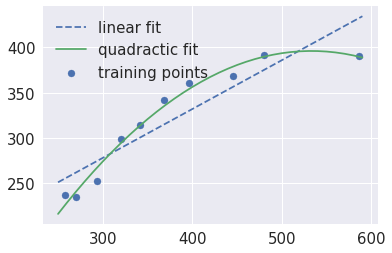

In [39]:
plt.scatter(X,y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadractic fit')
plt.legend(loc='upper left')
plt.show()


In the above plot, we can see that the polynomial fit captures the relationship between their response and explanatory variable much better than the linear fit.

In [38]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

print('Training MSE linear: %.3f, quadartic %.3f' %(mean_squared_error(y, y_lin_pred), 
                                                   mean_squared_error(y, y_quad_pred)))

print('Training R^2: %.3f, quadartic %.3f' %(r2_score(y, y_lin_pred), 
                                                   r2_score(y, y_quad_pred)))


Training MSE linear: 569.780, quadartic 61.330
Training R^2: 0.832, quadartic 0.982


the __coefficient of determination__ reflects a close fit or the qudaract model (__$R^2$ = 0.982__) as opposed to the linear fit (__$R^2$= 0.832__) in __this particular TOY problem.__

### Modelling nonlinear relationships in the Housing dataset

We will model the relationship between house prices and _LSTAT_(percent lower status of the population) as using second degree (quadraic) and third degre (cubic) polynomials and compare ti to a linear fit:

In [52]:
X = df[['LSTAT']].values
y = df[['MEDV']].values

regr = LinearRegression()

# create quadratic features

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit featues
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]


regr = regr.fit(X,y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

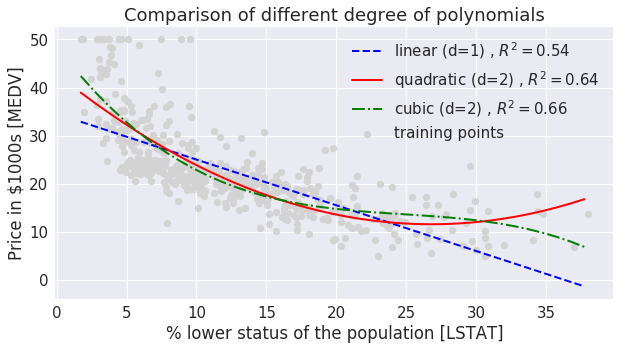

In [60]:
# plot results
plt.figure(figsize=(10,5))

plt.scatter(X, y,color='lightgrey', label='training points')
plt.plot(X_fit,y_lin_fit, color='blue', lw=2, linestyle = '--', label='linear (d=1) , $R^2 = %.2f$' %linear_r2)
plt.plot(X_fit, y_quad_fit, color='red', lw=2, label='quadratic (d=2) , $R^2 = %.2f$' % quadratic_r2)
plt.plot(X_fit, y_cubic_fit, color='green', lw=2, linestyle = '-.', label='cubic (d=2) , $R^2 = %.2f$' % cubic_r2)

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.title('Comparison of different degree of polynomials')
plt.legend(loc='upper right')
plt.show()

The cubic fit caputures the relationship beween house prices and LSTAT better than the linear and qudratic fit. However we sould be aware that the adding more and more polynomila featues increases the complexity of a model and therefor increases the chane of overfitting. Thus, in practice it is always recommended to evaluate the performance of the model  on a seprarate test dtaset to estimate the generalization performance.

IN addition, polynomial fatues are not alwasy the best choice for modeling noninear relationships. For example, with some experiecne or intuition, just looking at the MEDV-LSTAT scatterplot may lead to the hypothesis that a log-transformatin of the LSTAT featue variable and the square root fo MEDV may project the data on ta linear featue space suitatble ofor a linear regression fit.

for instance my perfcep tis that is relatinship between the two varibel looks quiate similar ot an eposnential funciton s: 
<center> $f(x) = 2^{-x}$</center>

Sicne thenatural logarithm of an exponential function is a straight line , I assume that sucha a log-trnsormation can be usefully applied here:

<center>$ log(f(x)) = -x $</center>

In [61]:
# transform featues
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit featuers
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

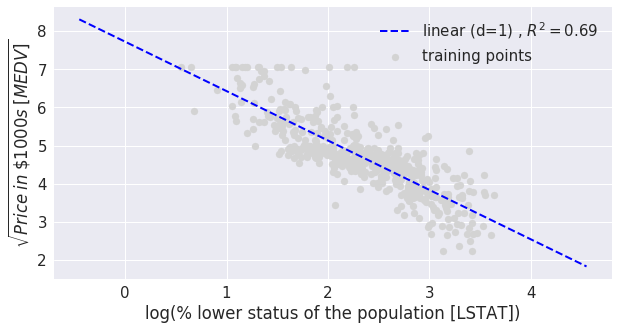

In [66]:
# plot results
plt.figure(figsize=(10,5))

plt.scatter(X_log, y_sqrt,color='lightgray', label='training points')
plt.plot(X_fit,y_lin_fit, color='blue', lw=2, linestyle = '--', label='linear (d=1) , $R^2 = %.2f$' %linear_r2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt {Price  \;in \; \$1000s \; [MEDV] }$')
plt.legend(loc='upper right')
plt.show()

### Dealing with nonlinear relationships using random forests

In this section, we are going to take a look at a __random forest__ regression which is coneptually different from the previous regression modesl in this chapter.

- a __random forest__ , which is an ensemble of multiple decison trees, can be understood as the __sum__ of __piece-wise linear fnctions __ in __contrst to the global linear and polynomial regression models__ that we discussed previously . 

- In other words, via the decision tree algorithm, we are subdividing the input space into smaller regions that become more _manageable_.

### Decision tree regression

An advantage of the decison tree algorithmis that itdoes not require any transoformaton of the featues if we are dealing with noninear data.

- When we used decison trees for classification, we defined entropy as a mesure of impurity to determine which feature split maximizes the __Informatoin Gain (IG)__, which can be defined as follows for a binary split.

<center>$ IG$</center>

Here, _x_ is the featue to perform the split, _$N_P$_ is the number of samples in the parent node, I is the impurit funciton , $D_P$ is the subset of training smaples at the parent naode,, and $D_{left}$ and $D_{right}$ are the subsets of trianing smaples at he left anf right child node after the split. Remember that or goal is to find the featue split ath maimized the informaton gian; or in other words, we want o find the fatue split that reduces the impurititeis in the child nodes most. While we discussed Gini ipurity and entorpy as meassuer of impurity for classification problem, whihc are both useful criteria for classifiaction.


- To  use a decison tree for regression, however, we need an impurity metric that is suitable for continuos variables so we define the impurity measuere of a node t as the __MSE__ instead:

<center>$I(t) = MSE(t) = \frac {1} {N} \sum_{iED_i}(y^{(i)}- y'_{i})^2$</center>

Here, $N_i$ is the number of training smaples at node $t$, $D_t$ is the trainig subset at node $t$, $y^{(i)}$ is the true target values, and $y'_i$ is the predicted target value (sample mean):

<center>$y' = \frac {1}{N} \sum _{i \belongsto D_i}y^{(i)}$</center>

In the context of deciosn tree regression, the MSE is often also referred to as __within-node variance__, which is why the splitting criterion is also better knsown as __variance reducitons __. To see what the line fit of adecisoni tree looks like, let us sue the _DecisioniTreeRegressor_ implemented in scikit-learn to modle the nolinear relationship between the _MEDV_ and _LSTAT_ varaibles:

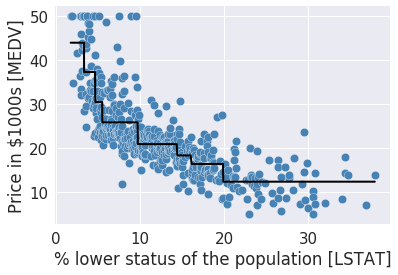

In [69]:
from sklearn.tree import DecisionTreeRegressor

X= df[['LSTAT']].values
y = df[['MEDV']].values

tree = DecisionTreeRegressor(max_depth =3)
tree.fit(X,y)

sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

We can see in the resulting plot, the deciosn tree aputes the genral trend in the data. However, a limitation ofthis model is that it doe not capture the continuity and differntiability of the desierd prediction. In addiotn we need to becarful about choosing an appropriate alue for the depth of the tree to not overfit or underfit the data; here, a depth of three seemed to be a good choice

### Random forest regression

The random forest algorithm is an ensemble technique that combines multiple decisioin trees. 
- random forest usually has a __better generalization performance __than an individual decison tree due to randomness, which helps to decrease the model's variance. 
- Other advantages of random forests are that they are less sensitive to outliers in the dataset and don't require much parameters tuning,
- The only parameter in random forests that we typically need to experiment with is the number of trees in the ensemble. 
- the basic random forest algorithm for regression alomst identical to the random forest algorithm for classification, the only differece is that we use the __MSE__ criterion to grow the individual decison trees, and the predicted target variable is calculated as the average prediction over all decison trees.

In [74]:
X = df.iloc[:,:-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=1)

In [75]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)

forest.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [76]:
y_train_pred  = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train : %.3f, test: %.3f' %(mean_squared_error(y_train, y_train_pred),
                                      mean_squared_error(y_test, y_test_pred)))

print('R^2 train : %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),
                                      r2_score(y_test, y_test_pred)))

MSE train : 1.642, test: 11.052
$R^2$ train : 0.979, test: 0.878


Unfortunately, we see that the random forest rends to overfit the training data.


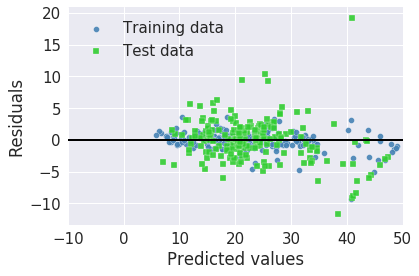

In [77]:
plt.scatter(y_train_pred, y_train_pred- y_train, c='steelblue', edgecolor='white', marker='o',s=35, alpha=0.9, label='Training data')
plt.scatter(y_test_pred, y_test_pred- y_test, c='limegreen', edgecolor='white', marker='s',s=35, alpha=0.9, label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10,50])
plt.show()

As it was already summarized by the $R^2$ coefficient, we can see that the model fits the training data beter than the test data, as indicated by the outliers in the y-axis direction. Also, the distribution of the residuals does not seem to be completely random around the zero center point, indicating that the model is not able to caputre all the explanatory information.

However, the residual plot indates a lareg improvement over the residual plot of the linear model that we plotted eariler in this chatper;

- Ideally or model erro should be random or unpredictable. In other words, the error of the predictions should not be related to any of the information contained in the explanatory variables. but should reflect the randomness of the real-world distributions or patterns, If we observe patterns in the perdiciton errors for example, by inspection of the resual plot, it means that the residual plots contain predictive information. A common reason for this could be that explanatory information is leaking into those residuals.

Unfortunately, there is now a universal approach for dealing with non-randomness in residual plots, and it requires experimentation . 
Depending on the data that is available to us, we may be able to improve the model by transforming variables, tune the hyper parameters of the learning algorithm, choosing simpler or more complex models, removing outliers, or including additional variables.

__Credits : _python Machine learning book by SEBASTIAN RASCHKA___